# Astronomy 19 Group Project 

By: Dylan, Eric, Ben

## 1. Download the dataset: 

go to the [NASA Exoplanet ArchiveLinks](https://exoplanetarchive.ipac.caltech.edu/) to an external site. and find the 55 Cnc system overview by typing "55 Cnc" into the Explore the Archive searchbar. Scroll down until you see "Ancillary Information" and download the "Radial Velocity Curve" that has 274 points. This will open a new tab with plain text, that you can save in a text file.

<span style="color:lightgreen"> Done!

In [273]:
%matplotlib inline

In [274]:
from astropy.io import ascii
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

## 2. In your Jupyter notebook, load the data:
time, radial velocity (RV), and experimental uncertainty on the RV data ; and plot this data. Save this figure as a PDF.

In [275]:
data = ascii.read('Data/UID_0043587_RVC_008.tbl.txt')
data

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999
2450087.88184,77.2600021362,2.1600001
2450088.91894,32.5999984741,1.64
2450089.00586,33.7299995422,1.5599999


In [276]:
print(data.columns)
print(data.colnames)
print(data.meta)
print(len(data))

<TableColumns names=('HJD','Radial_Velocity','Radial_Velocity_Uncertainty')>
['HJD', 'Radial_Velocity', 'Radial_Velocity_Uncertainty']
OrderedDict([('comments', []), ('keywords', OrderedDict([('STAR_ID', {'value': 'HD 75732'}), ('DATA_CATEGORY', {'value': 'Planet Radial Velocity Curve'}), ('NUMBER_OF_POINTS', {'value': '274'}), ('TIME_REFERENCE_FRAME', {'value': 'HJD'}), ('MINIMUM_DATE', {'value': '2449676.0632'}), ('DATE_UNITS', {'value': 'days'}), ('MAXIMUM_DATE', {'value': '2455603.80404'}), ('MINIMUM_VALUE', {'value': '-130.570007324'}), ('VALUE_UNITS', {'value': 'm/s'}), ('MAXIMUM_VALUE', {'value': '141.460006714'}), ('REFERENCE', {'value': 'Howard & Fulton, 2016'}), ('BIBCODE', {'value': '2016arXiv160603134H'}), ('TELESCOPE', {'value': '3.0m Shane'}), ('INSTRUMENT', {'value': 'l: Hamilton Spectrograph post-dewar 16 (after November 1994)'}), ('WAVELENGTH_CALIBRATION_TECHNIQUE', {'value': 'Iodine'}), ('OBSERVATORY_SITE', {'value': 'Lick Observatory, California'}), ('COLUMN_RADIAL_V

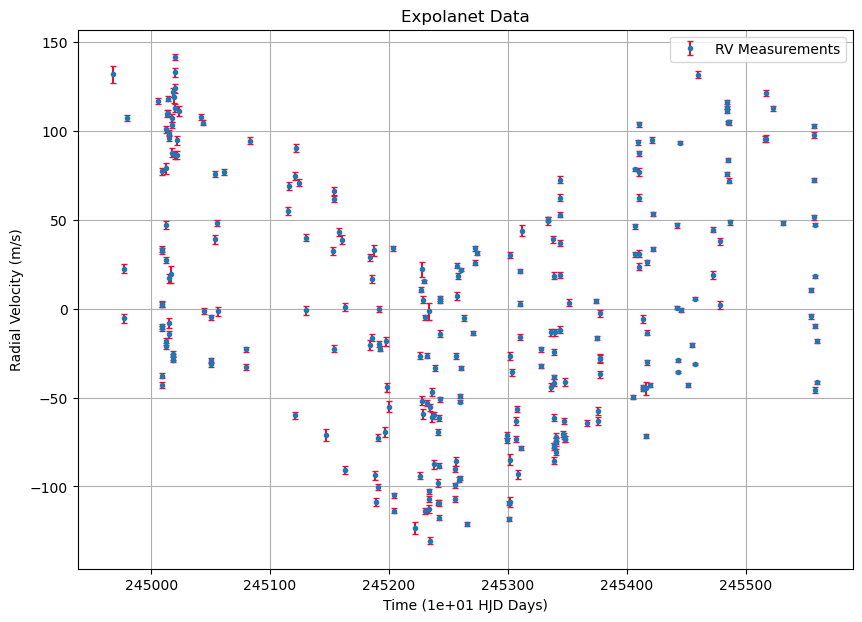

In [277]:
hjd = data.columns["HJD"]
radial_velocity = data.columns["Radial_Velocity"]
uncertainty = data.columns["Radial_Velocity_Uncertainty"]

scalar = 1e1
scaled_hjd = hjd / scalar

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, markersize=3, label="RV Measurements")

plt.title("Expolanet Data")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.savefig("saved_figures/q2_rv_data_plot.pdf")
plt.legend()
plt.grid()
plt.show()

## 3. Define an oscillatory function in Python to describe the variations of the radial velocity data:

Using the scipy library, fit the oscillatory function to the data, accounting for the uncertainty. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Provide sufficient labeling of data and the axes to provide clarity, and have the notebook save the figure to a PDF.

### 3.1 Define the oscillatory function

In [278]:
# define the model function we are trying to fit
# a: amplitude
# b: phase shift
# c: wavelength/period
# d: vertical shift
def f_curve(x, a, b, c, d):
    return a * np.sin(2.0*np.pi * (x - b) / c) + d

### 3.2 Fit the function accounting for uncertainty & Graph the model and data 

Fitted params: [ 4.79178271e+01  9.36575654e+03  4.80700695e+02 -1.41826367e+00]


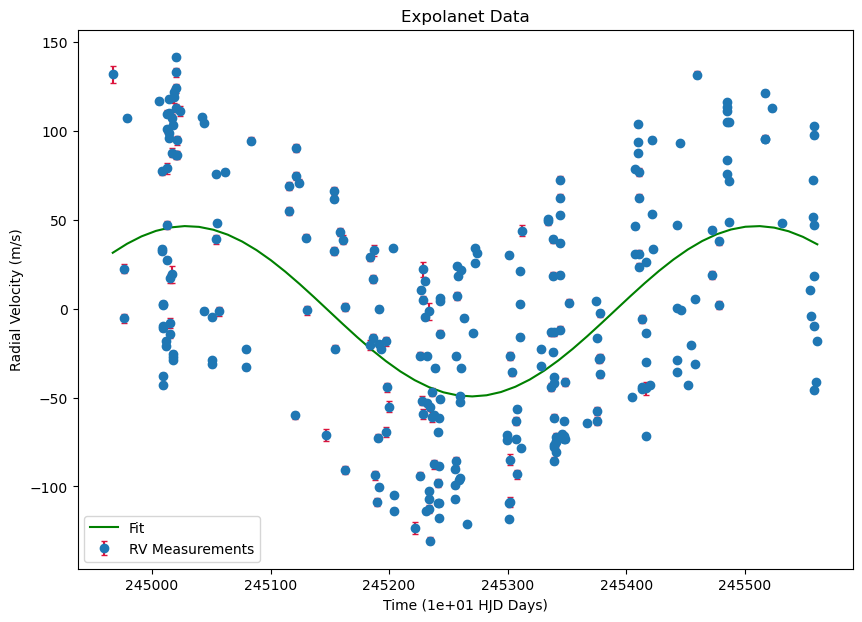

In [279]:
# intial guess
initial_guess = [45, 1, 500, 0]

# we can help scipy find the best fit value by providing the initial guess ourselves
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, radial_velocity, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess)


params1 = params

# print fitted parameters
print(f"Fitted params: {params}")

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)))
y_fit = f_curve(x_fit, *params)     

plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.savefig('saved_figures/q3_planet1_fit.pdf')
plt.show()

## 4. Next, subtract the best fit function from the data to obtain residuals, and plot them:

Assess graphically and mathematically deviations of the measured RV signal from the model. Plot a histogram of the residuals and measure their standard deviation. Is the scatter in the residuals larger than the assumed experimental error? Save the histogram as a PDF using our histogram best practices, including labeling of the data, axis labels, and "reasonable" bin widths as demonstrated in class.

### 4.1 Calculate the residuals

In [280]:
# calculate residuals
y_pred = f_curve(scaled_hjd, *params)
residuals1 = radial_velocity - y_pred

### 4.2 Plot the residuals as a scatter plot

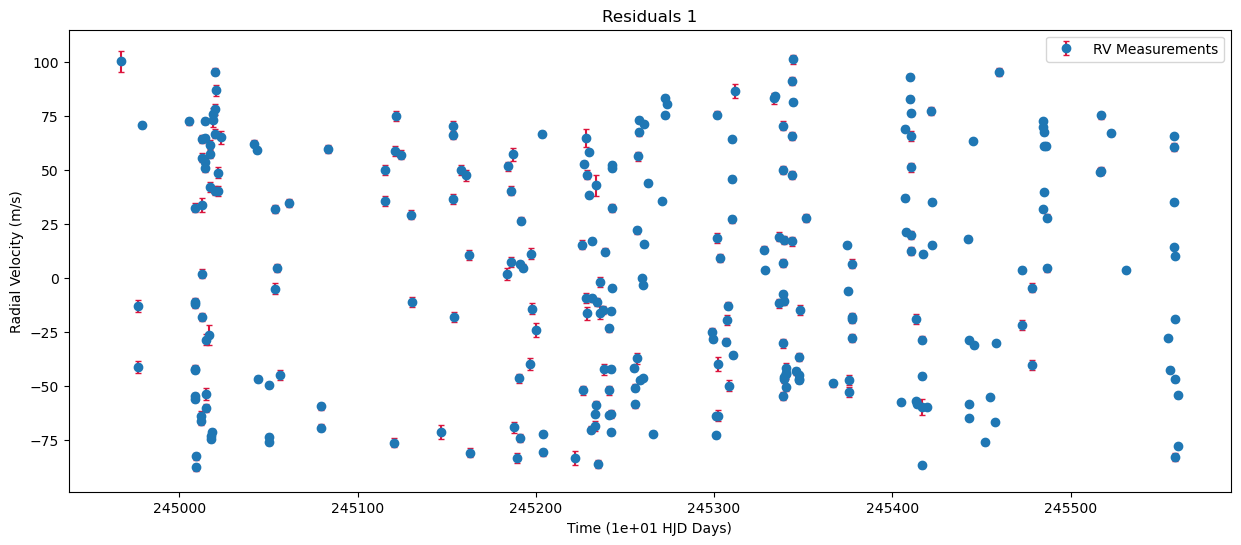

In [281]:
plt.figure(figsize=(15, 6))

# plot residuals
plt.errorbar(scaled_hjd, residuals1, uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 1")
plt.legend(frameon=True,fontsize=10,handletextpad=1)

plt.show()

### 4.3 Calculate residuals' statistics

In [282]:
residuals_mean = np.mean(residuals1)
residuals_std = np.std(residuals1)
residuals_rms = np.sqrt(np.mean(residuals1**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.8499898224963913
Residuals stdev is 52.2120813133502395
Residuals RMS is   52.2120813133502395


In [283]:
uncertainty_mean = np.mean(uncertainty)
uncertainty_std = np.std(uncertainty)
uncertainty_rms = np.sqrt(np.mean(uncertainty**2))

print(f"Uncertainty mean is  {uncertainty_mean:.16f}")
print(f"Uncertainty stdev is {uncertainty_std:.16f}")
print(f"Uncertainty RMS is   {uncertainty_std:.16f}")

Uncertainty mean is  1.8060667343065693
Uncertainty stdev is 0.6427887768668138
Uncertainty RMS is   0.6427887768668138


### 4.3 Plot the residuals as a histogram and save

In [284]:
def gaussian(x,mu,s):
    return 1./np.sqrt(2.0*np.pi*s**2) * np.exp(-0.5*((x-mu)/s)**2)

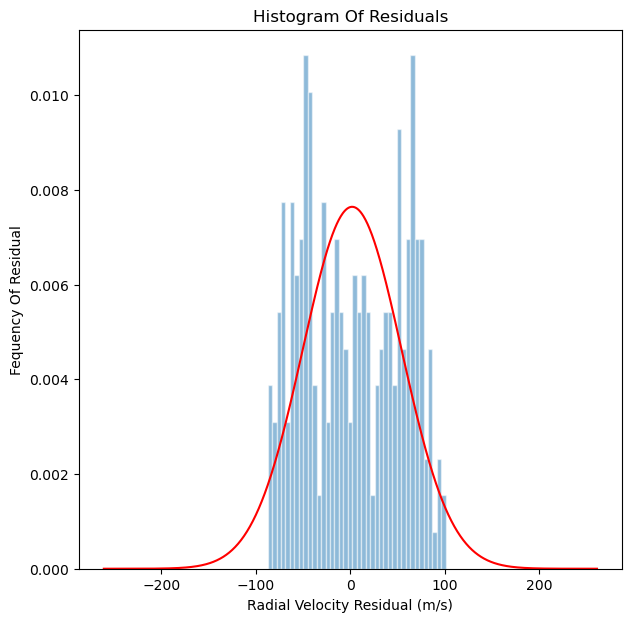

In [285]:
f,ax = plt.subplots(1,1,figsize=(7,7))

counts, bins_custom = np.histogram(residuals1,bins=40)
ax.hist(residuals1,bins=bins_custom,alpha=0.5,edgecolor="white",density=True)

# draw the gaussian function based on mean and stdev of residuals
x_g = np.linspace(-5*residuals_std,5*residuals_std,1000)

ax.plot(x_g,gaussian(x_g,residuals_mean,residuals_std),color="red", label="residual gaussian")
# ax.plot(x_g,gaussian(x_g,uncertainty_mean,uncertainty_std),color="pink", label="uncertainty gaussian")

ax.set_xlabel('Radial Velocity Residual (m/s)')
ax.set_ylabel('Fequency Of Residual')
ax.set_title('Histogram Of Residuals')

plt.savefig('saved_figures/q4_histogram_of_residuals.pdf')
plt.show()

Looking at the spread of the residuals, it appears to be much larger then the assumed experimental error. We can assume this is because the variation in the data isn't solely explained by this one exoplanet and is instead also affected by other exoplanets causing the unexplained variation in the data that this model doesn't explain.

## 5. Can you find more than 2 exoplanets in the RV data?

When multiple planets are orbiting around the star, the "wobbles" from each individual planets are simply summed. Repeat steps 3 and 4 to find a second planet in the RV data.

### 5.1 Fit curve on residuals and plot 

Fitted params: [-1.64450385e+01 -1.37056892e+03  2.61453569e+01 -2.63861974e-01]


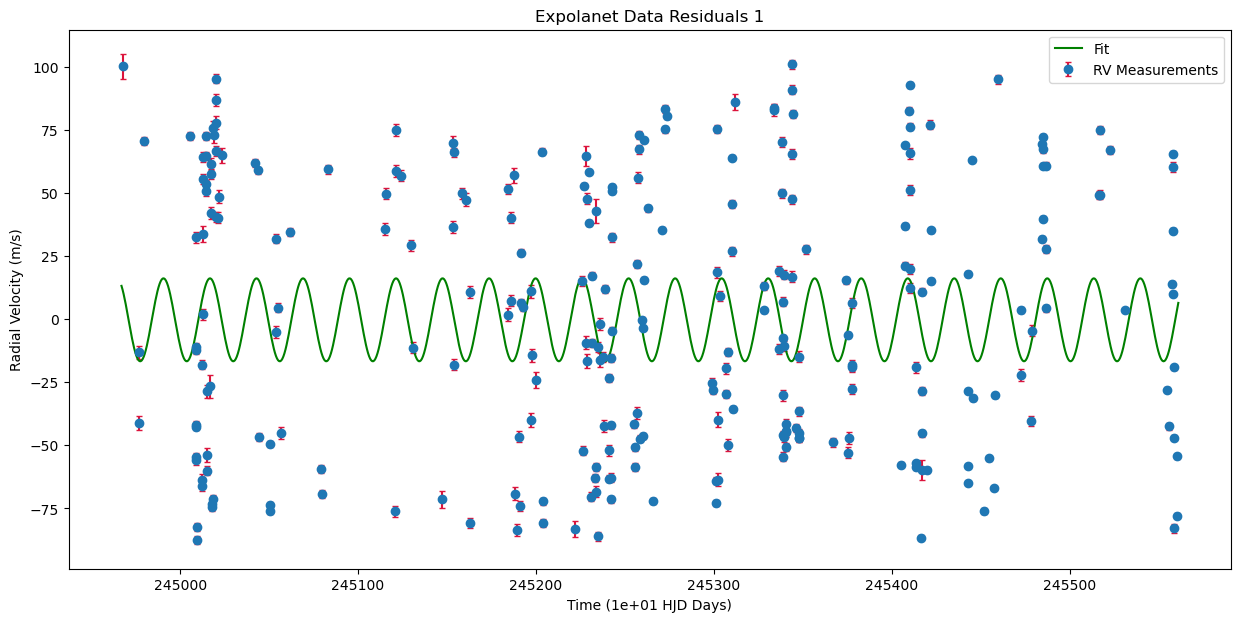

In [286]:
initial_guess = [5, 1, 26, 1]

#curve fit
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, residuals1, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess,
                                        )

params2 = params
    
print(f"Fitted params: {params}")

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = f_curve(x_fit, *params)

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals1, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 1")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

### 5.2 Create widget to test out different fits with our eye

Initial params: [-1.64450385e+01 -1.37056892e+03  2.61453569e+01 -2.63861974e-01]


interactive(children=(FloatSlider(value=-16.44503845693848, description='a', max=83.55496154306152, min=-116.4…

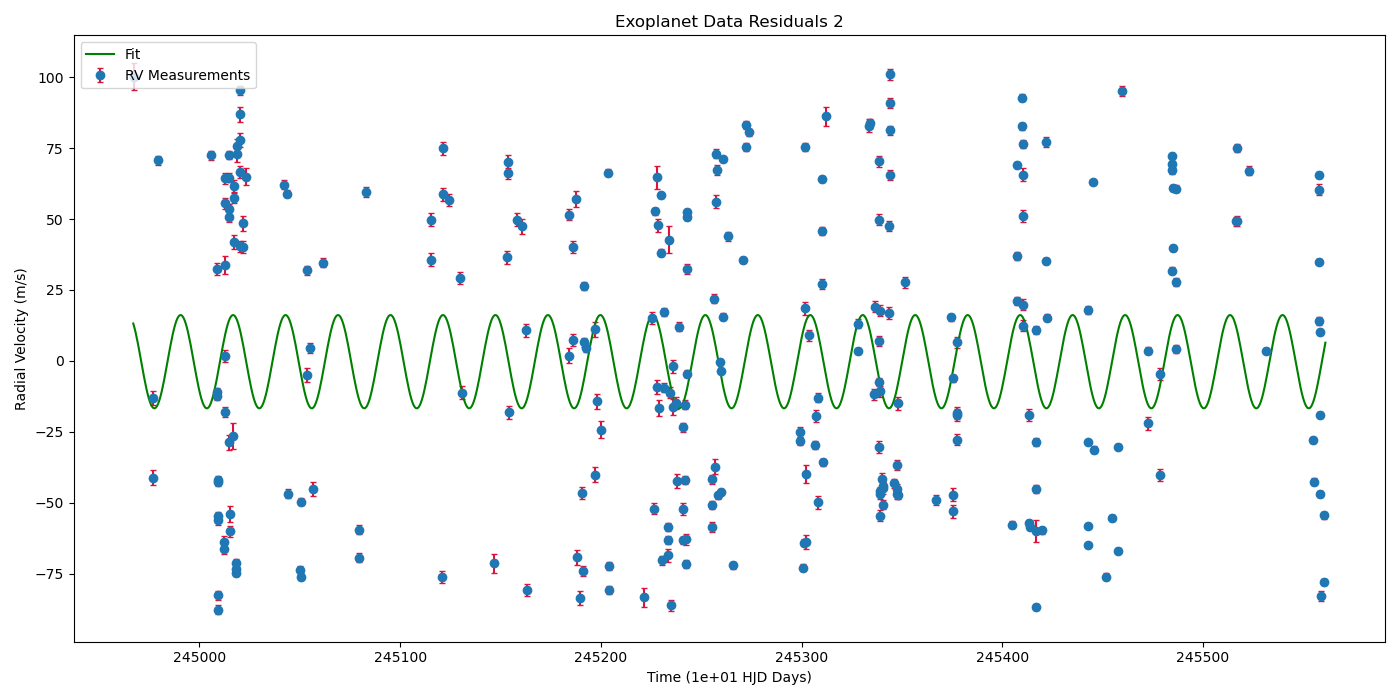

In [287]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib widget

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# Initial plot
ax.errorbar(x=scaled_hjd, y=residuals1, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

# Initial line
line1, = ax.plot(x_fit, y_fit, 'g-', label='Fit')

ax.set_title("Exoplanet Data Residuals 2")
ax.set_xlabel(f"Time ({scalar:.0e} HJD Days)")
ax.set_ylabel("Radial Velocity (m/s)")
ax.legend(frameon=True, loc='upper left')
plt.tight_layout()

# Print the parameters
print("Initial params:", params2)

# Define the update function
def update(a, b, c, d):
    y = f_curve(x_fit, a, b, c, d)
    line1.set_data(x_fit, y)
    fig.canvas.draw_idle()

# Create sliders ±100 around each param
sliders = {
    'a': widgets.FloatSlider(value=params2[0], min=params2[0]-100, max=params2[0]+100, step=1, description='a'),
    'b': widgets.FloatSlider(value=params2[1], min=params2[1]-100, max=params2[1]+100, step=0.1, description='b'),
    'c': widgets.FloatSlider(value=params2[2], min=params2[2]-100, max=params2[2]+100, step=0.1, description='c'),
    'd': widgets.FloatSlider(value=params2[3], min=params2[3]-100, max=params2[3]+100, step=1, description='d'),
}


out = widgets.interactive(update, a=sliders['a'], b=sliders['b'], c=sliders['c'], d=sliders['d'])

# Display everything
display(out)

In [288]:
%matplotlib inline

### 5.3 Calculate Residuals And Plot Them

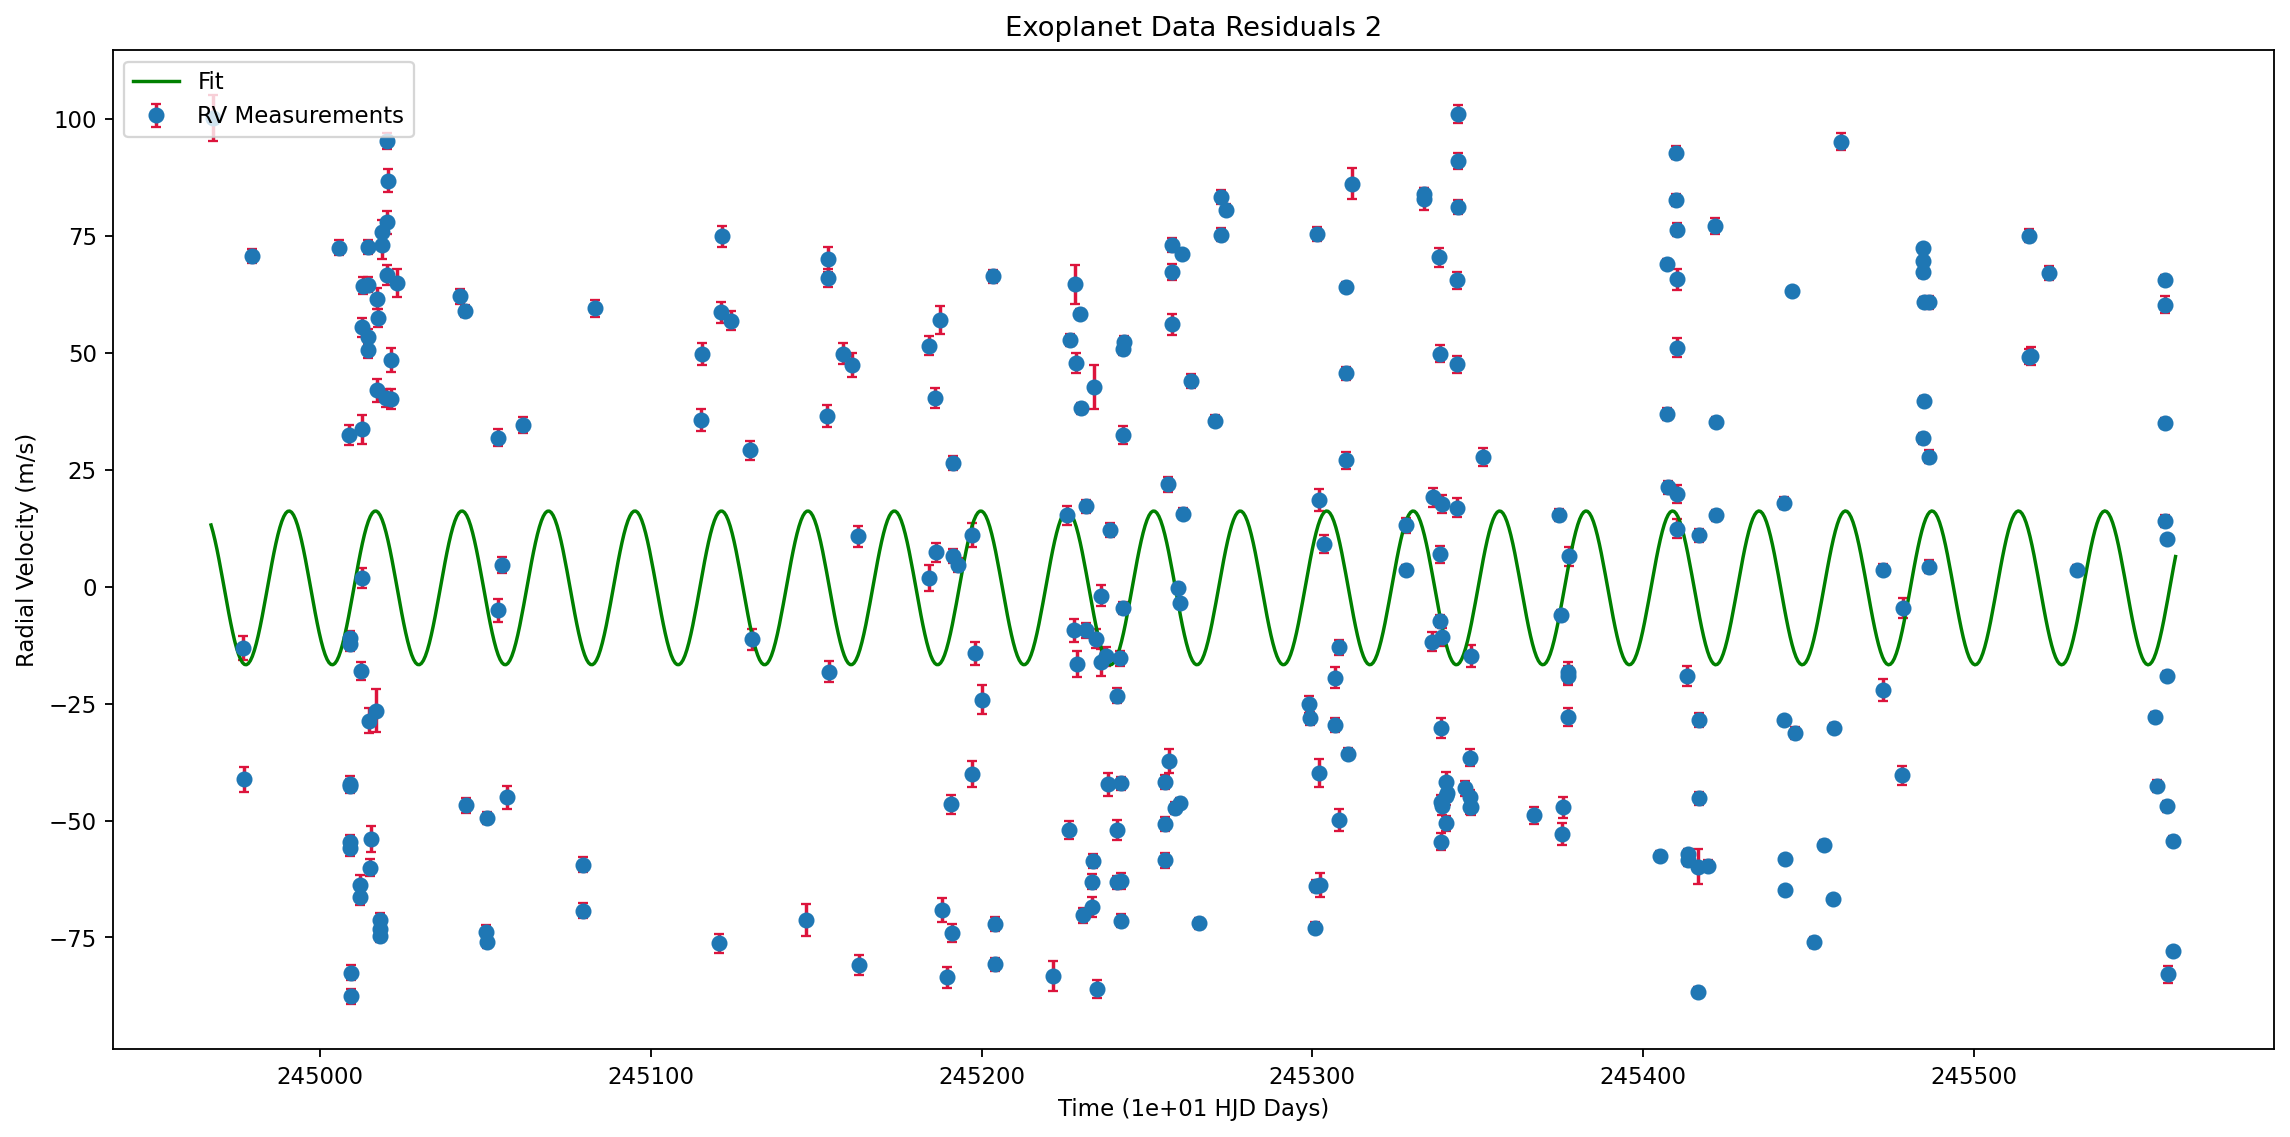

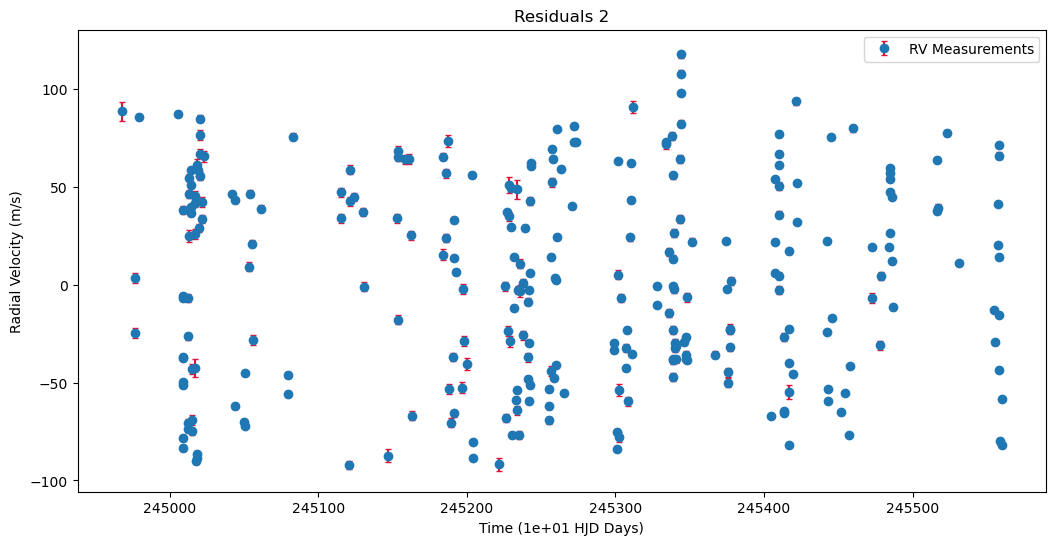

In [289]:
# calculate residual2
y_pred = f_curve(scaled_hjd, *params2)
residuals2 = residuals1 - y_pred

plt.figure(figsize=(12.5, 6))

# plot residual2
plt.errorbar(x=scaled_hjd, y=residuals2, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 2")
plt.legend()
plt.show()

In [290]:
residuals_mean = np.mean(residuals2)
residuals_std = np.std(residuals2)
residuals_rms = np.sqrt(np.mean(residuals2**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.5902884617377790
Residuals stdev is 51.2426306554380204
Residuals RMS is   51.2426306554380204


### Testing Sinusoid Sum

In [291]:
def two_sum(x, a1, b1, c1, d1, a2, b2, c2, d2):
    sin1 = f_curve(x, a1, b1, c1, d1)
    sin2 = f_curve(x, a2, b2, c2, d2)
    return sin1 + sin2

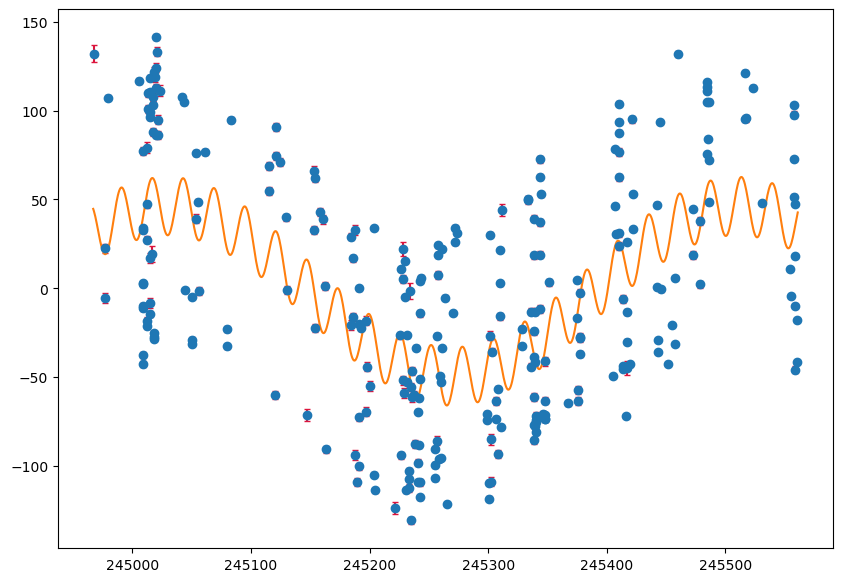

In [292]:
plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, two_sum(x_fit,
                            params1[0],
                            params1[1],
                            params1[2],
                            params1[3], 
                            params2[0],
                            params2[1],
                            params2[2],
                            params2[3], 
                            ))
plt.show()

In [293]:
final_initial_guess = np.concatenate((params1, params2))
final_initial_guess

array([ 4.79178271e+01,  9.36575654e+03,  4.80700695e+02, -1.41826367e+00,
       -1.64450385e+01, -1.37056892e+03,  2.61453569e+01, -2.63861974e-01])

Fitted params: [ 4.60208815e+01  8.56893498e+03  4.82328123e+02  1.50648728e+06
 -1.68814496e+01 -1.48657688e+03  2.61576430e+01 -1.50648855e+06]


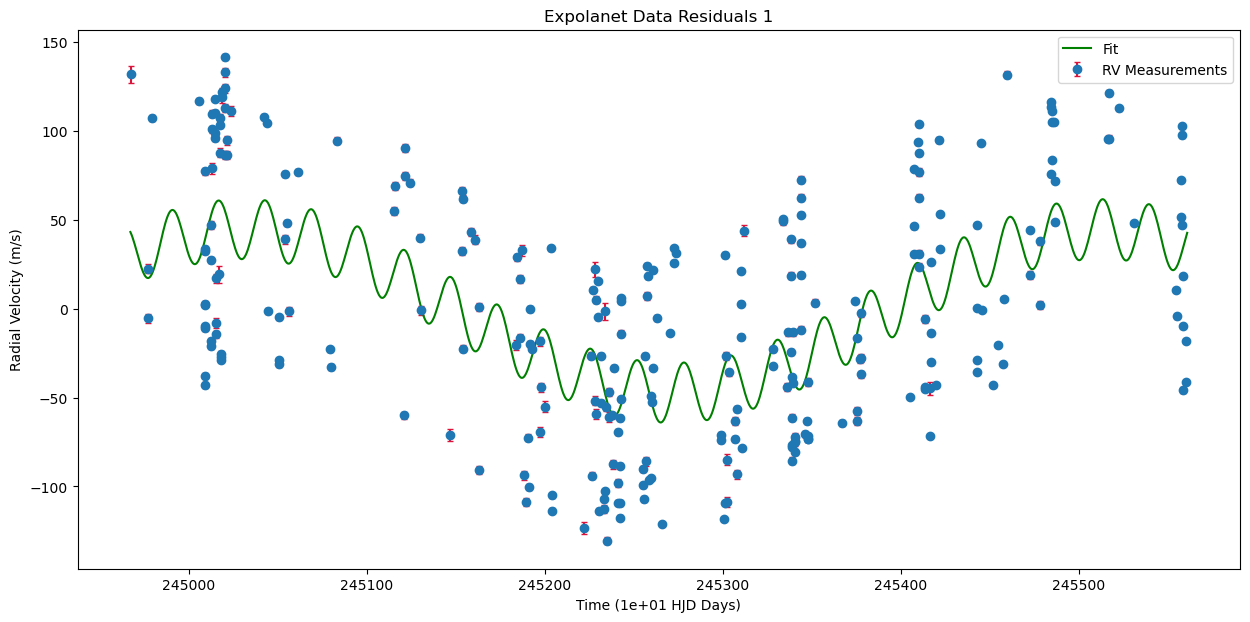

In [294]:
#curve fit
params, params_cov = optimize.curve_fit(two_sum, scaled_hjd, radial_velocity, sigma = uncertainty, absolute_sigma=True,
                                        p0=final_initial_guess,
                                        )
    
print(f"Fitted params: {params}")

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = two_sum(x_fit, *params)

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 1")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

### Back to more planets

Fitted params: [-1.41201535e+01  1.30174145e+03  4.37668002e+00 -2.71256691e-01]


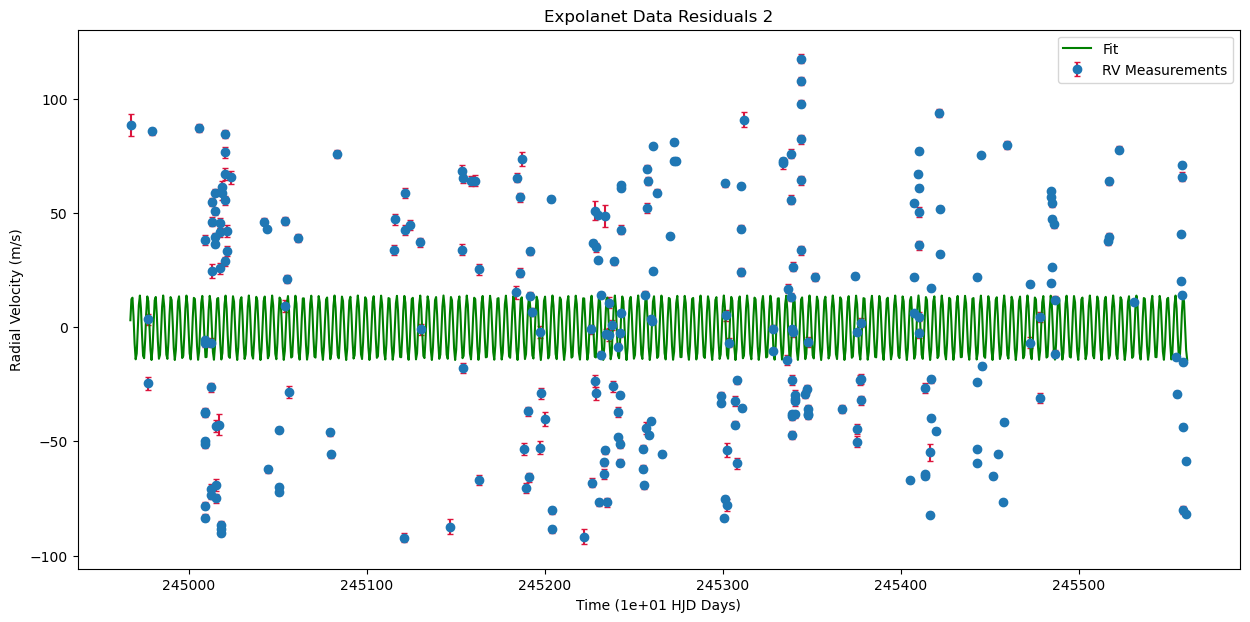

In [295]:
initial_guess = [10, 1, 4.4, 1]

#curve fit
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, residuals2, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess,
                                        )
    
print(f"Fitted params: {params}")

params3 = params

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = f_curve(x_fit, *params3)

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals2, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 2")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

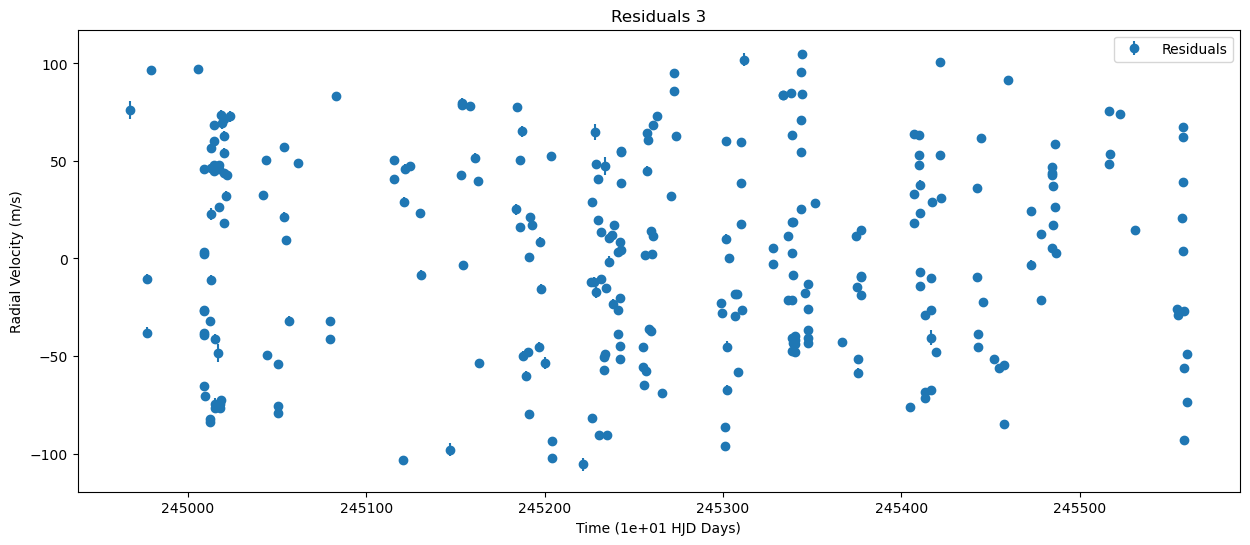

In [296]:
# calculate residual2
y_pred = f_curve(scaled_hjd, *params3)
residuals3 = residuals2 - y_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, residuals3, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 3")
plt.legend(frameon=True,fontsize=10,handletextpad=1)
plt.show()

In [297]:
residuals_mean = np.mean(residuals3)
residuals_std = np.std(residuals3)
residuals_rms = np.sqrt(np.mean(residuals3**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  2.0491879104735715
Residuals stdev is 51.3980819898499703
Residuals RMS is   51.3980819898499703


In [298]:
def three_sum(x, a1, b1, c1, d1, a2, b2, c2, d2, a3, b3, c3, d3):
    sin1 = f_curve(x, a1, b1, c1, d1)
    sin2 = f_curve(x, a2, b2, c2, d2)
    sin3 = f_curve(x, a3, b3, c3, d3)
    return sin1 + sin2 + sin3

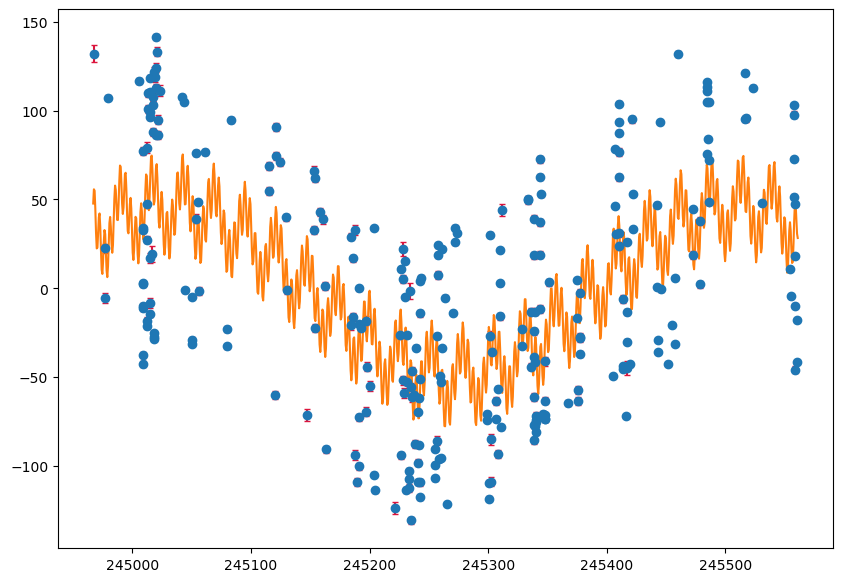

In [299]:
plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, three_sum(x_fit,
                            params1[0],
                            params1[1],
                            params1[2],
                            params1[3], 
                            params2[0],
                            params2[1],
                            params2[2],
                            params2[3], 
                            params3[0],
                            params3[1],
                            params3[2],
                            params3[3], 
                            ))
plt.show()

In [300]:
final_initial_guess = np.concatenate((params1, params2, params3))
final_initial_guess

array([ 4.79178271e+01,  9.36575654e+03,  4.80700695e+02, -1.41826367e+00,
       -1.64450385e+01, -1.37056892e+03,  2.61453569e+01, -2.63861974e-01,
       -1.41201535e+01,  1.30174145e+03,  4.37668002e+00, -2.71256691e-01])

Fitted params: [ 4.76062916e+01  6.30847602e+03  4.86934629e+02 -2.61126167e+06
 -1.73102641e+01 -3.02365173e+03  2.63205785e+01 -2.58339425e+06
 -1.52394182e+01  1.26394583e+03  4.37735742e+00  5.19465486e+06]


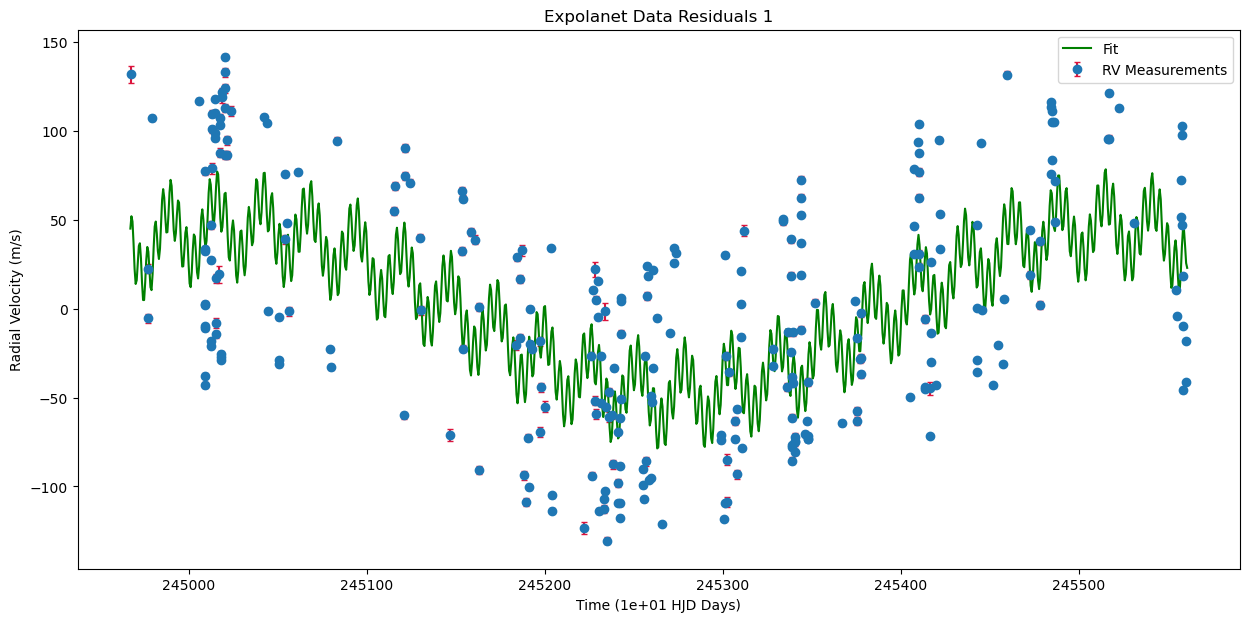

In [301]:
#curve fit
params, params_cov = optimize.curve_fit(three_sum, scaled_hjd, radial_velocity, sigma = uncertainty, absolute_sigma=True,
                                        p0=final_initial_guess,
                                        )

three_sum_params = params
print(f"Fitted params: {params}")

three_sum_params = params

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = three_sum(x_fit, *params)

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 1")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

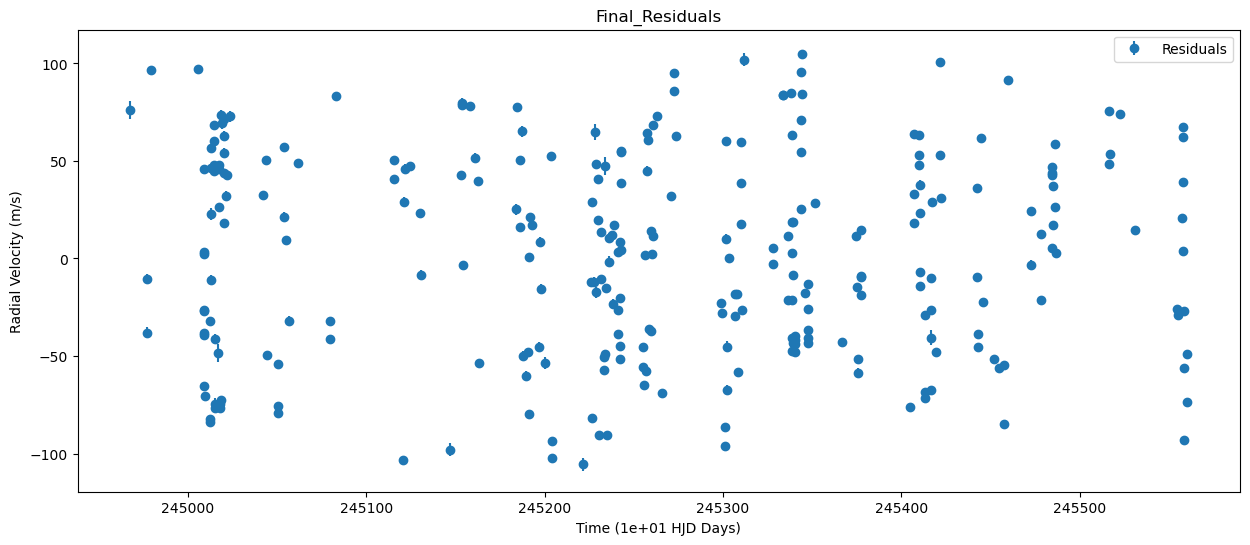

In [302]:
# calculate residual2
final_pred = three_sum(scaled_hjd, *final_initial_guess)
final_residuals = radial_velocity - final_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, final_residuals, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Final_Residuals")
plt.legend(frameon=True,fontsize=10,handletextpad=1)
plt.show()

In [303]:
residuals_mean = np.mean(final_residuals)
residuals_std = np.std(final_residuals)
residuals_rms = np.sqrt(np.mean(final_residuals**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  2.0491879104735715
Residuals stdev is 51.3980819898499703
Residuals RMS is   51.3980819898499703


In [304]:
def gaussian(x,mu,s):
    return 1./np.sqrt(2.0*np.pi*s**2) * np.exp(-0.5*((x-mu)/s)**2)

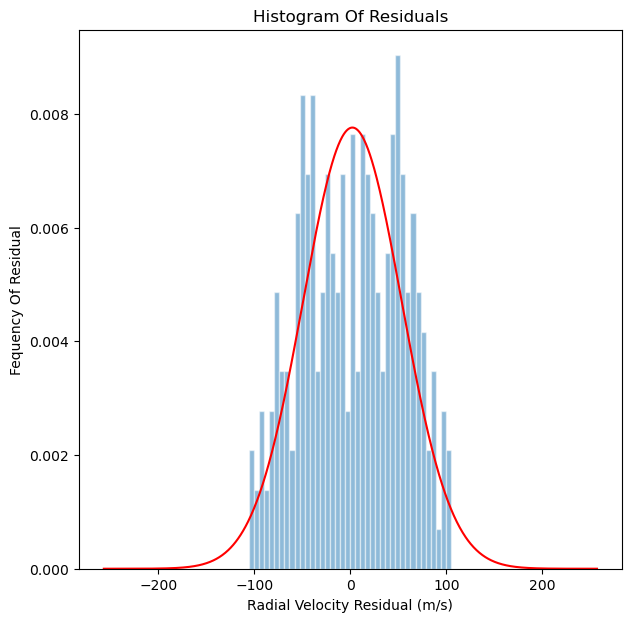

In [305]:
f,ax = plt.subplots(1,1,figsize=(7,7))

counts, bins_custom = np.histogram(final_residuals,bins=40)
ax.hist(final_residuals,bins=bins_custom,alpha=0.5,edgecolor="white",density=True)

# draw the gaussian function based on mean and stdev of residuals
x_g = np.linspace(-5*residuals_std,5*residuals_std,1000)
ax.plot(x_g,gaussian(x_g,residuals_mean,residuals_std),color="red")

ax.set_xlabel('Radial Velocity Residual (m/s)')
ax.set_ylabel('Fequency Of Residual')
ax.set_title('Histogram Of Residuals')

plt.show()

Residual Standard Deviation for 1 Planet model: 52.2120813133502395 

Residual Standard Deviation for 3 Planet model: 51.3980819898499703

The 3 planet model has a smaller spread of residuals and thus explains the data a bit better

### 6. Using information from the [NASA Exoplanet ArchiveLinks](https://exoplanetarchive.ipac.caltech.edu/) to an external site, determine which exoplanet(s) you discovered.

For a planet on a circular orbit and zero inclination, the mass of the exoplanet is given by:

$M_{\mathrm{exoplanet}} = \left(\frac{K}{28.4 ~\text{m/s}}\right) \left(\frac{P}{365~\text{days}}\right)^{1/3} \left(M_{\star}\right)^{2/3}$


where K is the amplitude of the RV signal (in m/s), P is the period of the planet (in days), 
is the mass of the star in units of the mass of the Sun, and 
is obtained in Jupiter masses. See example below. Use the amplitudes K and periods P obtained by your fit to calculate the mass of the exoplanets found in the RV data. Using information from the [NASA Exoplanet ArchiveLinks](https://exoplanetarchive.ipac.caltech.edu/) to an external site., determine which exoplanet(s) you discovered.

Example of exoplanet mass calculation: the star WASP-39 has a mass of 0.918 times the mass of the Sun, and the exoplanet WASP-39 b has an amplitude $K=36.9$  m/s and a period  $P=4.05$ days, which gives $M_{\mathrm{exoplanet}} = \left(\frac{36.9}{28.4 ~\text{m/s}}\right) \left(\frac{4.05}{365~\text{days}}\right)^{1/3} \left(0.918\right)^{2/3} = 0.274 ~M_{\mathrm{Jup}}$ . The exoplanet **WASP-39 b** is 0.274 the mass of Jupiter.

### 6.1 Determine which exoplanets you discovered

**Note: since we scaled the data by dividng by 1e1 ($10^1$) at the beginning of the hw we have to scale the multiplying by 1e1 to get the correct units** 

In [306]:
print("Parameters of planet 1: ", three_sum_params[0:4])
print()
print("Parameters of planet 2: ", three_sum_params[4:8])
print()
print("Parameters of planet 3: ", three_sum_params[8:12])

Parameters of planet 1:  [ 4.76062916e+01  6.30847602e+03  4.86934629e+02 -2.61126167e+06]

Parameters of planet 2:  [-1.73102641e+01 -3.02365173e+03  2.63205785e+01 -2.58339425e+06]

Parameters of planet 3:  [-1.52394182e+01  1.26394583e+03  4.37735742e+00  5.19465486e+06]


In [307]:
K1, K2, K3 = three_sum_params[0:4][0], three_sum_params[4:8][0], three_sum_params[8:12][0]
P1, P2, P3 = three_sum_params[0:4][2] * scalar, three_sum_params[4:8][2]*scalar, three_sum_params[8:12][2]*scalar

In [308]:
print(f"Planet 1 K: {K1}")
print(f"Planet 1 P: {P1}")
print()
print(f"Planet 2 K: {K2}")
print(f"Planet 2 P: {P2}")
print()
print(f"Planet 3 K: {K3}")
print(f"Planet 3 P: {P3}")

Planet 1 K: 47.606291611667054
Planet 1 P: 4869.346291018321

Planet 2 K: -17.310264075838496
Planet 2 P: 263.20578488489036

Planet 3 K: -15.239418194503525
Planet 3 P: 43.77357424639016


Here are the approximates of K and P for the known exoplanets in 55 Cnc from the NASA Exoplanet Archive

* e: $K \approx 6.5$, $P \approx 0.73$
* b: $K \approx 71$, $P \approx 14.65$
* c: $K \approx 10$, $P \approx 44$
* f: $K \approx 5$, $P \approx 260$
* d: $K \approx 45$, $P \approx 4820$

<span style="color:lightgreen"> 

1. It appears that planet 1 is planet e as they have similar values

2. It appears that planet 2 is planet f as they have similar values

3. It appears that planet 3 is planet c as they have similar values

Note: For amplitude the sign ($\pm$) doesn't matter cause you can just flip the wave
</span>

### 6.2 Calculate mass of the exoplanets in Jupyter masses

In [309]:
M_star = 0.95  # Mass of star in solar masses (from NASA Archive)
K_list = [K1, K2, K3]
P_list = [P1, P2, P3]

for i, K in enumerate(K_list):
    K_list[i] = np.abs(K)

def estimate_mass(K, P, M_star): # Mass formula provided
    return (K/28.4) * (P/365)**(1/3) * M_star**(2/3)

for i, (K, P) in enumerate(zip(K_list, P_list), 1):
    m_jup = estimate_mass(K, P, M_star)
    print(f"Planet {i}: K = {K:.2f} m/s, P = {P:.2f} d, M ≈ {m_jup:.3f} M_Jup")

Planet 1: K = 47.61 m/s, P = 4869.35 d, M ≈ 3.842 M_Jup
Planet 2: K = 17.31 m/s, P = 263.21 d, M ≈ 0.528 M_Jup
Planet 3: K = 15.24 m/s, P = 43.77 d, M ≈ 0.256 M_Jup


## 7. Trying for 5 Planets?

Remind us what the plot for residuals3 is

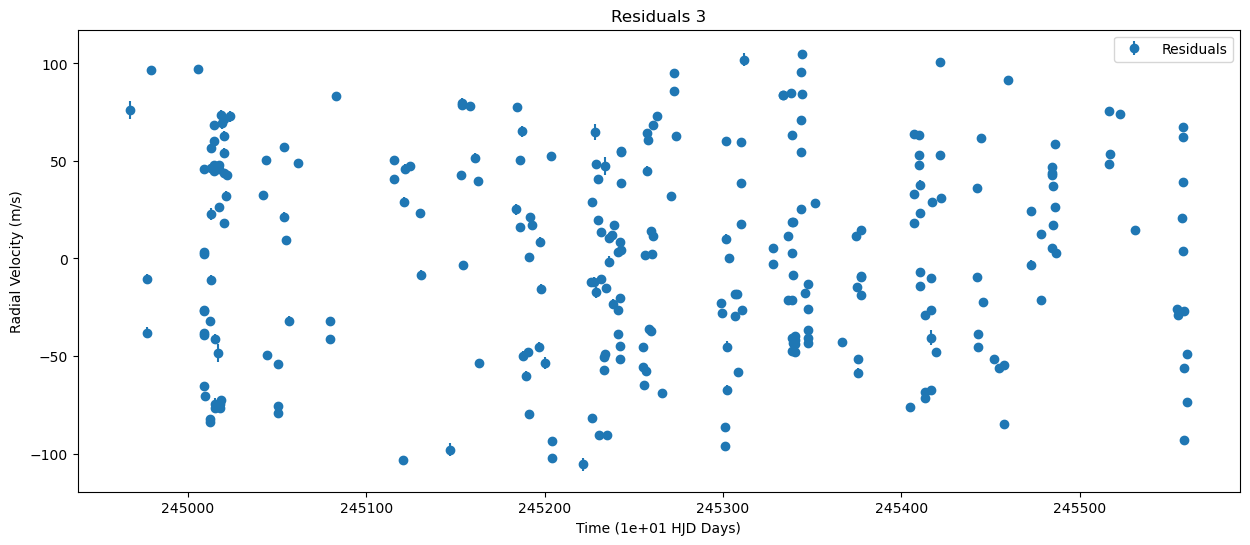

In [310]:
plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, residuals3, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 3")
plt.legend(frameon=True,fontsize=10,handletextpad=1)
plt.show()

Fit a model for a 4th planet

Fitted params: [ 9.69529912e+00 -1.50878041e+04  6.36874520e+01  3.71398978e-01]


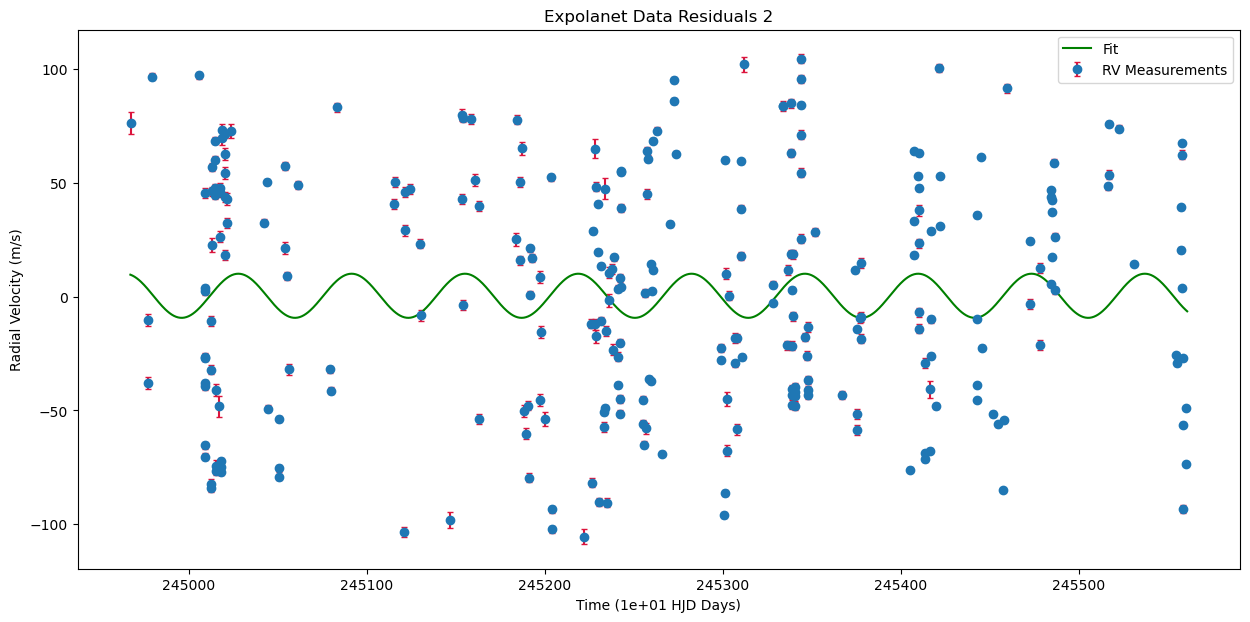

In [311]:
initial_guess = [71, 1, 60, 1]

#curve fit
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, residuals3, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess,
                                        )
    
print(f"Fitted params: {params}")

params4 = params

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = f_curve(x_fit, *params4)    
                                    

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals3, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 2")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

Plot the residuals for the 4th planet

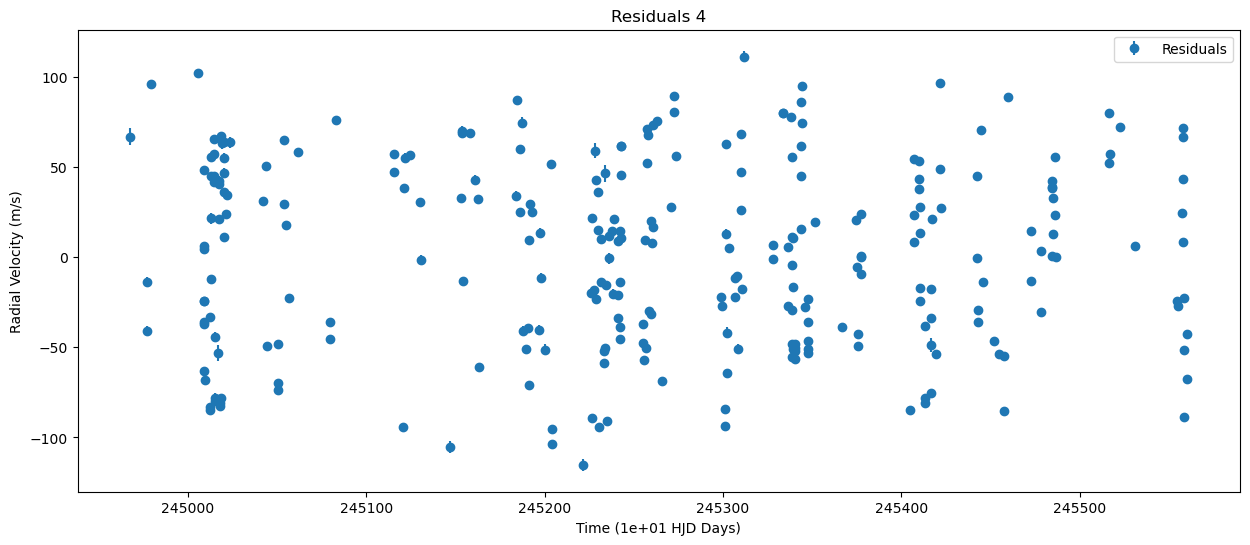

In [312]:
# calculate residual2
y_pred = f_curve(scaled_hjd, *params4)
residuals4 = residuals3 - y_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, residuals4, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 4")
plt.legend(frameon=True,fontsize=10,handletextpad=1)
plt.show()

Calculate Residual Stats

In [313]:
residuals_mean = np.mean(residuals4)
residuals_std = np.std(residuals4)
residuals_rms = np.sqrt(np.mean(residuals4**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.4284497561777820
Residuals stdev is 50.9718369900456452
Residuals RMS is   50.9718369900456452


Fit model for a 5th planet

Fitted params: [-1.25420287e+01  2.31581485e+04  5.43355526e+01  1.48078279e+00]


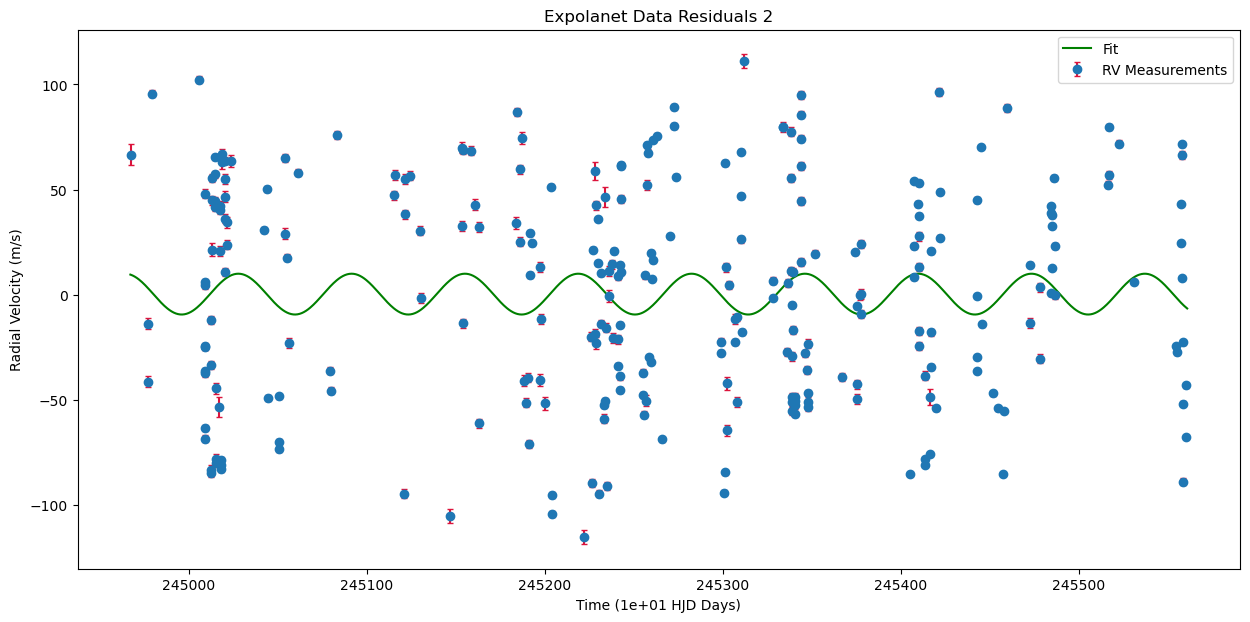

In [314]:
initial_guess = [71, 1, 60, 1]

#curve fit
params, params_cov = optimize.curve_fit(f_curve, scaled_hjd, residuals4, sigma = uncertainty, absolute_sigma=True,
                                        p0=initial_guess,
                                        )
    
print(f"Fitted params: {params}")

params5 = params

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = f_curve(x_fit, *params4)    
                                    

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=residuals4, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 2")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

Plot residuals5

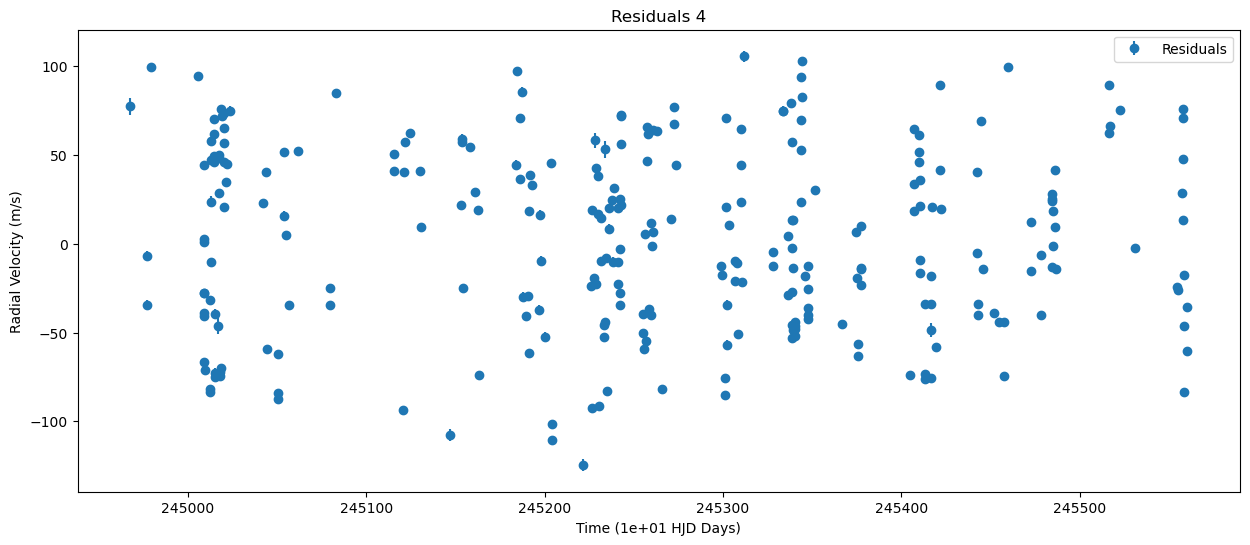

In [315]:
# calculate residual2
y_pred = f_curve(scaled_hjd, *params5)
residuals5 = residuals4 - y_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, residuals5, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Residuals 4")
plt.legend(frameon=True,fontsize=10,handletextpad=1)
plt.show()

Calcualte residuals5 stats

In [316]:
residuals_mean = np.mean(residuals5)
residuals_std = np.std(residuals5)
residuals_rms = np.sqrt(np.mean(residuals5**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  2.4679638700590090
Residuals stdev is 51.0807500349671528
Residuals RMS is   51.0807500349671528


### Do the 5 planet model

In [317]:
def five_sum(x,
            a1, b1, c1, d1,
            a2, b2, c2, d2,
            a3, b3, c3, d3,
            a4, b4, c4, d4,
            a5, b5, c5, d5
            ):
    sin1 = f_curve(x, a1, b1, c1, d1)
    sin2 = f_curve(x, a2, b2, c2, d2)
    sin3 = f_curve(x, a3, b3, c3, d3)
    sin4 = f_curve(x, a4, b4, c4, d4)
    sin5 = f_curve(x, a5, b5, c5, d5)
    return sin1 + sin2 + sin3 + sin4 + sin5

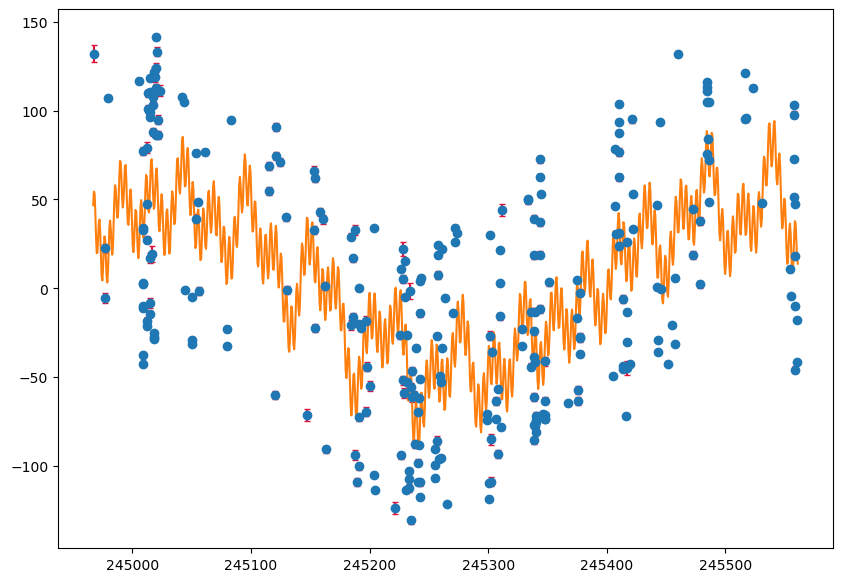

In [318]:
plt.figure(figsize=(10, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty,
            fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, five_sum(x_fit,
                            params1[0],
                            params1[1],
                            params1[2],
                            params1[3], 
                            params2[0],
                            params2[1],
                            params2[2],
                            params2[3], 
                            params3[0],
                            params3[1],
                            params3[2],
                            params3[3], 
                            params4[0],
                            params4[1],
                            params4[2],
                            params4[3],
                            params5[0],
                            params5[1],
                            params5[2],
                            params5[3], 
                            ))
plt.show()

In [319]:
final_initial_guess = np.concatenate((params1, params2, params3, params4, params5))

Optimize the 5 planet model

Fitted params: [ 4.94746452e+01  1.30106649e+03  4.97160388e+02 -8.26448664e+06
 -1.80393485e+01 -5.58953638e+03  2.65924458e+01  2.72471945e+06
 -1.37818917e+01  1.25467272e+03  4.37752315e+00  2.49927480e+06
  1.99881245e+01 -1.18437174e+04  6.28939591e+01 -1.41722383e+07
 -1.75572132e+01  1.30898975e+04  5.67970484e+01  1.72127351e+07]


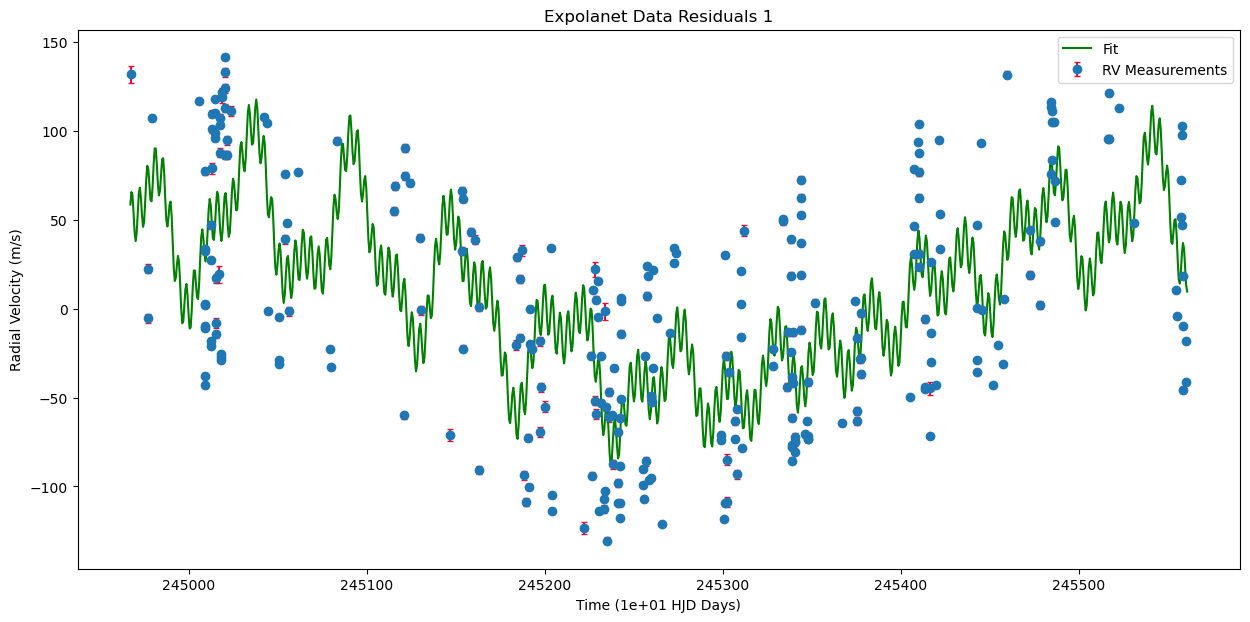

In [320]:
#curve fit
params, params_cov = optimize.curve_fit(five_sum, scaled_hjd, radial_velocity, sigma = uncertainty, absolute_sigma=True,
                                        p0=final_initial_guess,
                                        # bounds = (lower_bound, upper_bound)
                                        )
    
print(f"Fitted params: {params}")

five_planet_params = params

x_fit = np.linspace(np.floor(min(scaled_hjd)), np.ceil(max(scaled_hjd)), 1000)
y_fit = five_sum(x_fit, *five_planet_params) 

plt.figure(figsize=(15, 7))
plt.errorbar(x=scaled_hjd, y=radial_velocity, yerr=uncertainty, fmt="o", ecolor='crimson', capsize=2, label="RV Measurements")
plt.plot(x_fit, y_fit, 'g-', label='Fit')
plt.title("Expolanet Data Residuals 1")
plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")

plt.legend()
plt.show()

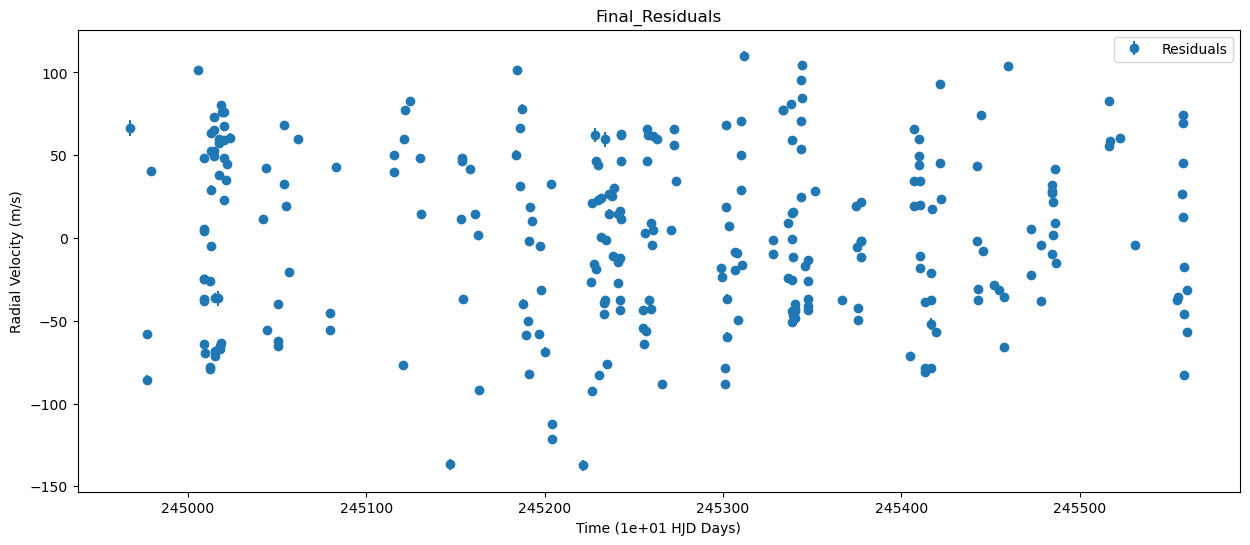

In [321]:
# calculate residual2
final_pred = five_sum(scaled_hjd, *five_planet_params)
final_residuals = radial_velocity - final_pred

plt.figure(figsize=(15, 6))

# plot residual2
plt.errorbar(scaled_hjd, final_residuals, uncertainty, fmt='o', label='Residuals')

plt.xlabel(f"Time ({scalar:.0e} HJD Days)")
plt.ylabel("Radial Velocity (m/s)")
plt.title("Final_Residuals")
plt.legend(frameon=True,fontsize=10,handletextpad=1)
plt.show()

In [322]:
residuals_mean = np.mean(final_residuals)
residuals_std = np.std(final_residuals)
residuals_rms = np.sqrt(np.mean(final_residuals**2))

print(f"Residuals mean is  {residuals_mean:.16f}")
print(f"Residuals stdev is {residuals_std:.16f}")
print(f"Residuals RMS is   {residuals_std:.16f}")

Residuals mean is  1.7852698513965537
Residuals stdev is 51.3811100926926301
Residuals RMS is   51.3811100926926301


In [323]:
print("Parameters of planet 1: ", five_planet_params[0:4])
print()
print("Parameters of planet 2: ", five_planet_params[4:8])
print()
print("Parameters of planet 3: ", five_planet_params[8:12])
print()
print("Parameters of planet 4: ", five_planet_params[12:16])
print()
print("Parameters of planet 5: ", five_planet_params[16:20])

Parameters of planet 1:  [ 4.94746452e+01  1.30106649e+03  4.97160388e+02 -8.26448664e+06]

Parameters of planet 2:  [-1.80393485e+01 -5.58953638e+03  2.65924458e+01  2.72471945e+06]

Parameters of planet 3:  [-1.37818917e+01  1.25467272e+03  4.37752315e+00  2.49927480e+06]

Parameters of planet 4:  [ 1.99881245e+01 -1.18437174e+04  6.28939591e+01 -1.41722383e+07]

Parameters of planet 5:  [-1.75572132e+01  1.30898975e+04  5.67970484e+01  1.72127351e+07]


In [325]:
K1, K2, K3, K4, K5 = five_planet_params[0:4][0], five_planet_params[4:8][0], five_planet_params[8:12][0], five_planet_params[12:16][0], five_planet_params[16:20][0]
P1, P2, P3, P4, P5 = five_planet_params[0:4][2] * scalar, five_planet_params[4:8][2]*scalar, five_planet_params[8:12][2]*scalar, five_planet_params[12:16][2]*scalar, five_planet_params[16:20][2]*scalar

In [326]:
print(f"Planet 1 K: {K1}")
print(f"Planet 1 P: {P1}")
print()
print(f"Planet 2 K: {K2}")
print(f"Planet 2 P: {P2}")
print()
print(f"Planet 3 K: {K3}")
print(f"Planet 3 P: {P3}")
print()
print(f"Planet 4 K: {K4}")
print(f"Planet 4 P: {P4}")
print()
print(f"Planet 5 K: {K5}")
print(f"Planet 5 P: {P5}")

Planet 1 K: 49.47464520740683
Planet 1 P: 4971.603879900723

Planet 2 K: -18.03934846785536
Planet 2 P: 265.9244576128179

Planet 3 K: -13.7818917436349
Planet 3 P: 43.77523154683145

Planet 4 K: 19.988124505069614
Planet 4 P: 628.9395908504121

Planet 5 K: -17.557213233599644
Planet 5 P: 567.9704839705595


Here are the approximates of K and P for the known exoplanets in 55 Cnc from the NASA Exoplanet Archive

* e: $K \approx 6.5$, $P \approx 0.73$
* b: $K \approx 71$, $P \approx 14.65$
* c: $K \approx 10$, $P \approx 44$
* f: $K \approx 5$, $P \approx 260$
* d: $K \approx 45$, $P \approx 4820$

<span style="color:lightgreen"> 

1. It appears that planet 1 is planet e as they have similar values

2. It appears that planet 2 is planet f as they have similar values

3. It appears that planet 3 is planet c as they have similar values

4. Planet 4 and 5 don't seem to be real planets

Note: For amplitude the sign ($\pm$) doesn't matter cause you can just flip the wave
</span>

Residual Standard Deviation for 1 Planet model: 52.2120813133502395 

Residual Standard Deviation for 3 Planet model: 51.3980819898499703

Residual Standard Deviation for 5 Planet model: 51.3811100926926301

The 5 planet model has a similar spread of residuals to the 3 planet model, so it seems like our models for planet 4 and 5 aren't good and don't actually explain more od the data :/